# Calibration for Regression Models

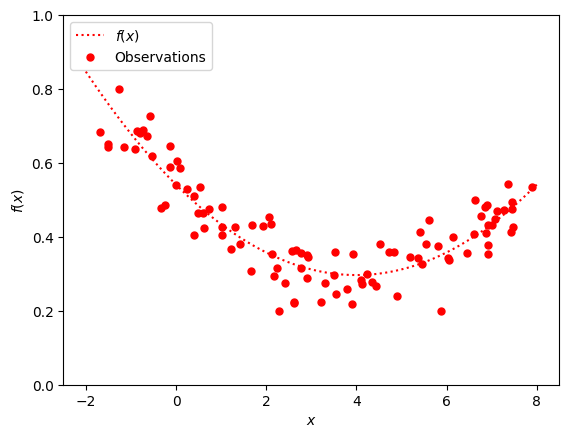

In [14]:
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as pl

def f(x):
    """The function to predict."""
    return 6*(x-4)**2+20

x = np.atleast_2d(np.linspace(-2, 8, 1000)).T

X = 10* np.random.random(100) - 2
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 15 + 15.0 * np.random.random(y.shape[0])
noise = np.random.normal(0, dy)
y += noise
scaler = MinMaxScaler((0.2, 0.8))
y = scaler.fit_transform(y.reshape(-1, 1)).ravel()

plt.figure()
plt.plot(x, scaler.transform(f(x)), 'r:', label=r'$f(x)$')
plt.plot(X.ravel(), y, 'r.', markersize=10, label='Observations')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0, 1)
plt.legend(loc='upper left')

plt.show()

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.calibration import calibration_curve

model = LinearRegression()
model.fit(X, y)

LinearRegression()

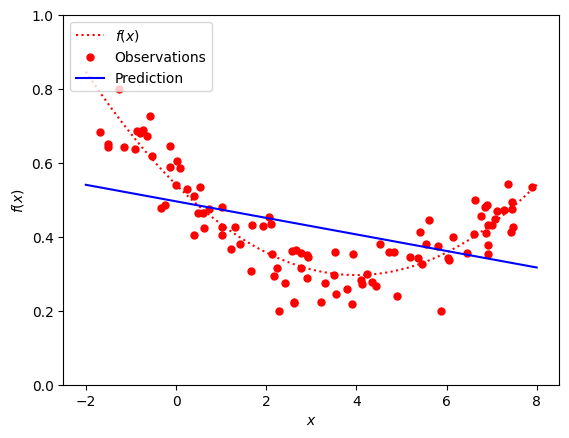

In [17]:
y_pred = model.predict(x)

plt.figure()

plt.plot(x, scaler.transform(f(x)), 'r:', label=r'$f(x)$')
plt.plot(X.ravel(), y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0, 1)
plt.legend(loc='upper left')

plt.show()

## 1. Reliability Diagram

Compare predictions with actual values in intervals.

* Divide predictions into quantiles.
* Calculate the mean of the predictions at each quantile.
* Compare with the actual mean observed at each quantile.

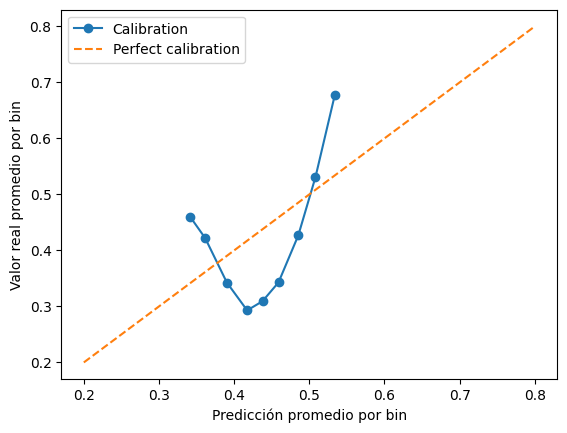

In [24]:
y_pred = model.predict(X)

percentiles = np.percentile(y_pred, np.linspace(0, 100, 10))
bins = np.digitize(y_pred, percentiles)
y_means = [y[bins == i].mean() for i in range(1, len(percentiles))]

# Reliability Diagram
plt.plot(percentiles[1:], y_means, 'o-', label="Calibration")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', label="Perfect calibration")
plt.xlabel("Predicción promedio por bin")
plt.ylabel("Valor real promedio por bin")
plt.legend()
plt.show()

# 2. Test de Normalidad en los Errores (Residuos)
* Verificar si los errores (y_real - y_pred) siguen una distribución normal con media 0.
* Un modelo bien calibrado debería producir errores centrados en 0 y con distribución normal.

p-value de Shapiro-Wilk: 0.15329733375963567


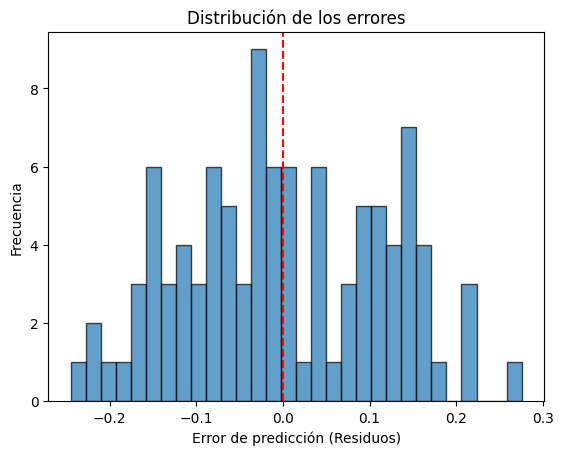

In [22]:
import scipy.stats as stats

residuals = y - y_pred

# Prueba de normalidad de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print(f"p-value de Shapiro-Wilk: {shapiro_test.pvalue}")

# Histograma de los residuos
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error de predicción (Residuos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los errores")
plt.show()

# 3. Gráfico Q-Q de Residuos
* Comparar la distribución de los residuos con una normal teórica.

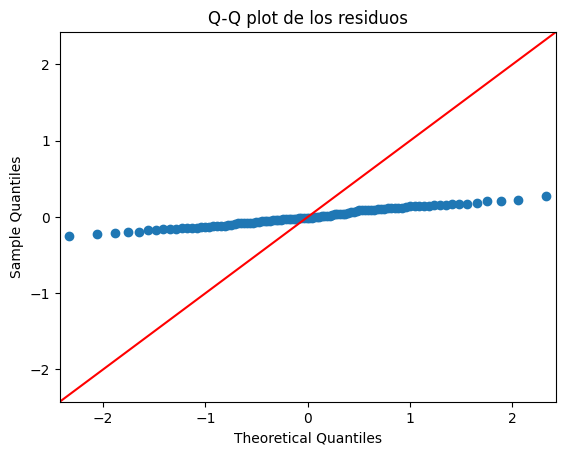

In [23]:
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title("Q-Q plot de los residuos")
plt.show()

## 4. Calibration Based on Quantiles (Coverage Probability)
* Measure whether the actual values fall within the expected prediction intervals.
* If you have a model that predicts confidence intervals (e.g., quantile regression or conformal prediction), you can check whether the percentage of actual values within the interval matches the theoretical probability.

In [25]:
lower_bound = quantile_model_05.predict(X_test)  # Percentil 5%
upper_bound = quantile_model_95.predict(X_test)  # Percentil 95%

coverage = np.mean((y_test >= lower_bound) & (y_test <= upper_bound))
print(f"Porcentaje de valores reales dentro del intervalo de predicción: {coverage * 100:.2f}%")

NameError: name 'quantile_model_05' is not defined